In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\pelik\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ОБРАБОТКА НЕФТИ

In [242]:
brent = pd.read_csv('data/Brent.csv',sep=',',parse_dates=['Date'], dayfirst=True)

In [243]:
brent

,Date,Price,Open,Max,Min,Volume,Change
0,2024-05-10,82.79,84.21,84.53,82.70,311.45K,-1.30
1,2024-05-09,83.88,83.79,84.33,83.45,309.45K,0.36
2,2024-05-08,83.58,83.02,83.82,81.71,395.43K,0.71
3,2024-05-07,82.99,83.74,83.82,82.42,NaN,-0.73
4,2024-05-06,83.60,83.24,83.83,82.78,NaN,0.42
...,...,...,...,...,...,...,...
6000,2001-01-08,24.43,25.33,25.63,24.40,27.82K,-2.98
6001,2001-01-05,25.18,25.40,26.02,25.15,34.99K,-0.67
6002,2001-01-04,25.35,25.09,25.85,24.77,32.81K,1.28
6003,2001-01-03,25.03,24.50,25.30,24.20,36.40K,3.00


In [244]:
p = pd.date_range(start='01-02-2001', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['Date'])

# Объединяем исходный df с df_full
brent = pp.merge(brent, on='Date', how='left')

In [246]:
brent.ffill(inplace=True)

In [247]:
brent

,Date,Price,Open,Max,Min,Volume,Change
0,2001-01-02,24.30,24.40,24.90,24.20,25.21K,1.80
1,2001-01-03,25.03,24.50,25.30,24.20,36.40K,3.00
2,2001-01-04,25.35,25.09,25.85,24.77,32.81K,1.28
3,2001-01-05,25.18,25.40,26.02,25.15,34.99K,-0.67
4,2001-01-06,25.18,25.40,26.02,25.15,34.99K,-0.67
...,...,...,...,...,...,...,...
8525,2024-05-06,83.60,83.24,83.83,82.78,335.57K,0.42
8526,2024-05-07,82.99,83.74,83.82,82.42,335.57K,-0.73
8527,2024-05-08,83.58,83.02,83.82,81.71,395.43K,0.71
8528,2024-05-09,83.88,83.79,84.33,83.45,309.45K,0.36


In [248]:
brent.to_csv('ready_data/brent.csv',encoding='utf-8')

<Axes: xlabel='Date'>

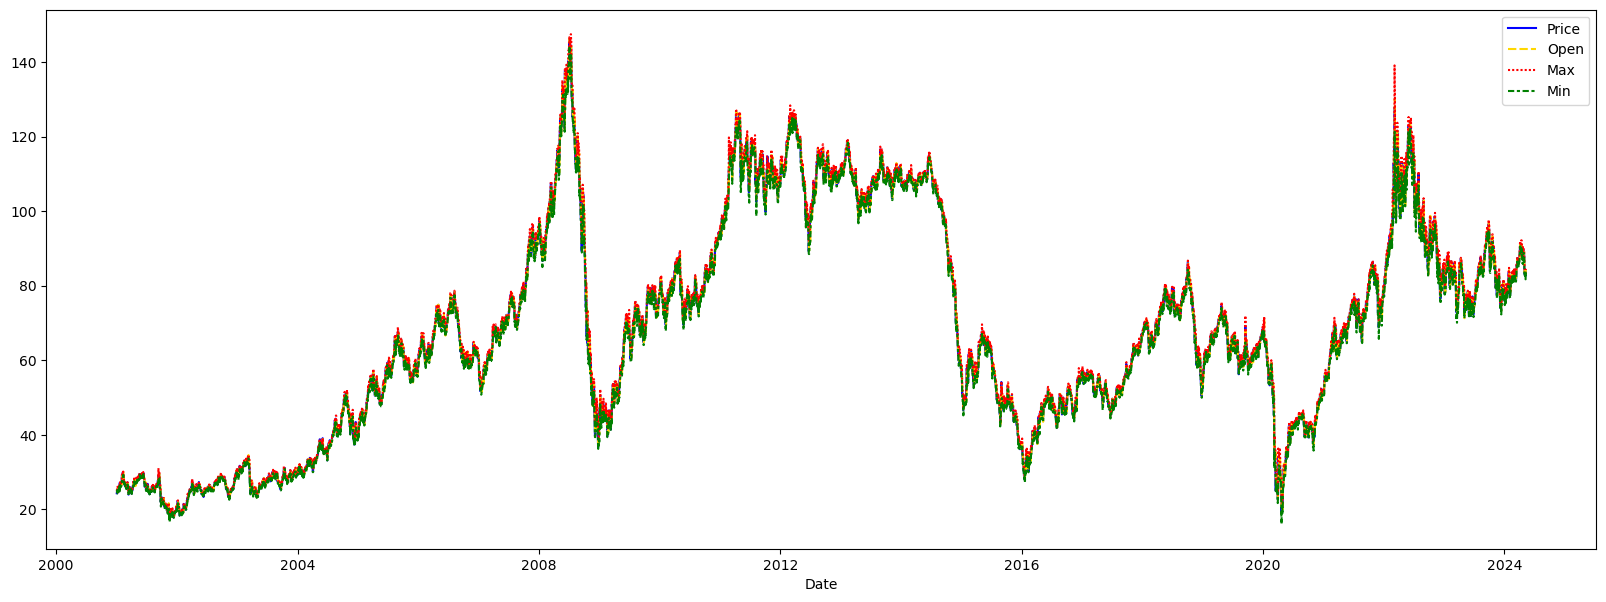

In [249]:
plt.figure(figsize=(20,7))
sns.lineplot(data=brent.set_index('Date')[['Price','Open','Max','Min']],palette=['blue','gold','red','green'])

# ОБРАБОТКА ИНФЛЯЦИИ

In [4]:
inflation = pd.read_csv('data/inflation.csv',sep=',')

In [96]:
inflation = inflation[['Year',' Total']]

In [97]:
inflation

,Year,Total
0,2001,18.58
1,2002,15.06
2,2003,11.99
3,2004,11.74
4,2005,10.91
5,2006,9.00
6,2007,11.87
7,2008,13.28
8,2009,8.80
9,2010,8.78


In [98]:
inflation['Year'] ='01-01-' + inflation['Year'].astype('str')

C:\Users\pelik\AppData\Local\Temp\ipykernel_4328\1597051437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation['Year'] ='01-01-' + inflation['Year'].astype('str')


In [99]:
inflation.Year = inflation.Year.astype('datetime64[ns]')

C:\Users\pelik\AppData\Local\Temp\ipykernel_4328\3752068534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation.Year = inflation.Year.astype('datetime64[ns]')


In [100]:
p = pd.date_range(start='01-01-2001', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['Year'])

# Объединяем исходный df с df_full
inflation = pp.merge(inflation, on='Year', how='left')

In [101]:
inflation.ffill(inplace=True)

In [102]:
inflation

,Year,Total
0,2001-01-01,18.58
1,2001-01-02,18.58
2,2001-01-03,18.58
3,2001-01-04,18.58
4,2001-01-05,18.58
...,...,...
8526,2024-05-06,7.42
8527,2024-05-07,7.42
8528,2024-05-08,7.42
8529,2024-05-09,7.42


In [103]:
inflation.to_csv('ready_data/inflation.csv',encoding='utf-8')

<Axes: xlabel='Year'>

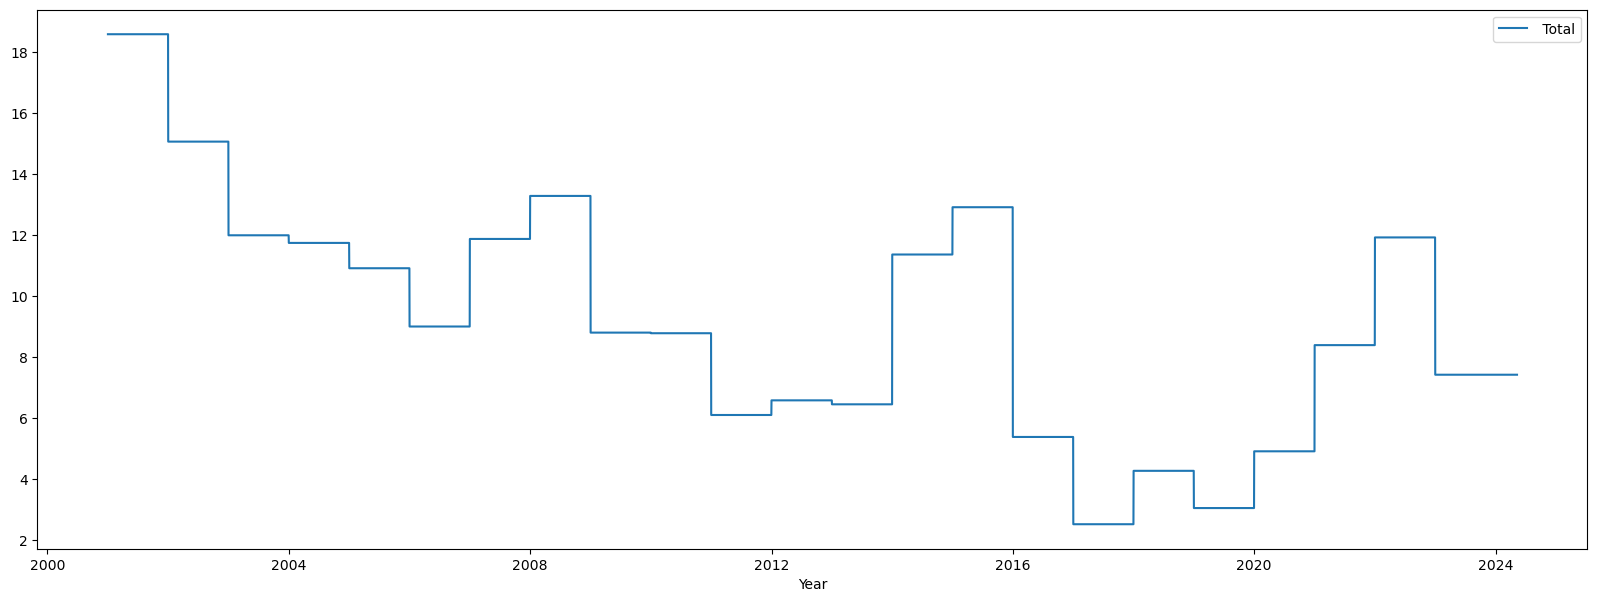

In [250]:
plt.figure(figsize=(20,7))
sns.lineplot(data=inflation.set_index('Year'))

# ОБРАБОТКА KLUCH

In [231]:
kluch = pd.read_csv('data/kluch.csv',sep=';',parse_dates=['date'], dayfirst=True)

In [232]:
kluch

,date,stavka
0,2024-02-16,16.0
1,2023-12-15,16.0
2,2023-10-27,15.0
3,2023-09-15,13.0
4,2023-08-15,12.0
...,...,...
134,1993-06-02,110.0
135,1993-03-30,100.0
136,1992-05-23,80.0
137,1992-04-10,50.0


In [236]:
p = pd.date_range(start='01-01-1992', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['date'])

# Объединяем исходный df с df_full
kluch = pp.merge(kluch, on='date', how='left')

In [238]:
kluch.ffill(inplace=True)

In [239]:
kluch

,date,stavka
0,1992-01-01,20.0
1,1992-01-02,20.0
2,1992-01-03,20.0
3,1992-01-04,20.0
4,1992-01-05,20.0
...,...,...
11814,2024-05-06,16.0
11815,2024-05-07,16.0
11816,2024-05-08,16.0
11817,2024-05-09,16.0


In [240]:
kluch.to_csv('ready_data/kluch.csv',encoding='utf-8')

<Axes: xlabel='date'>

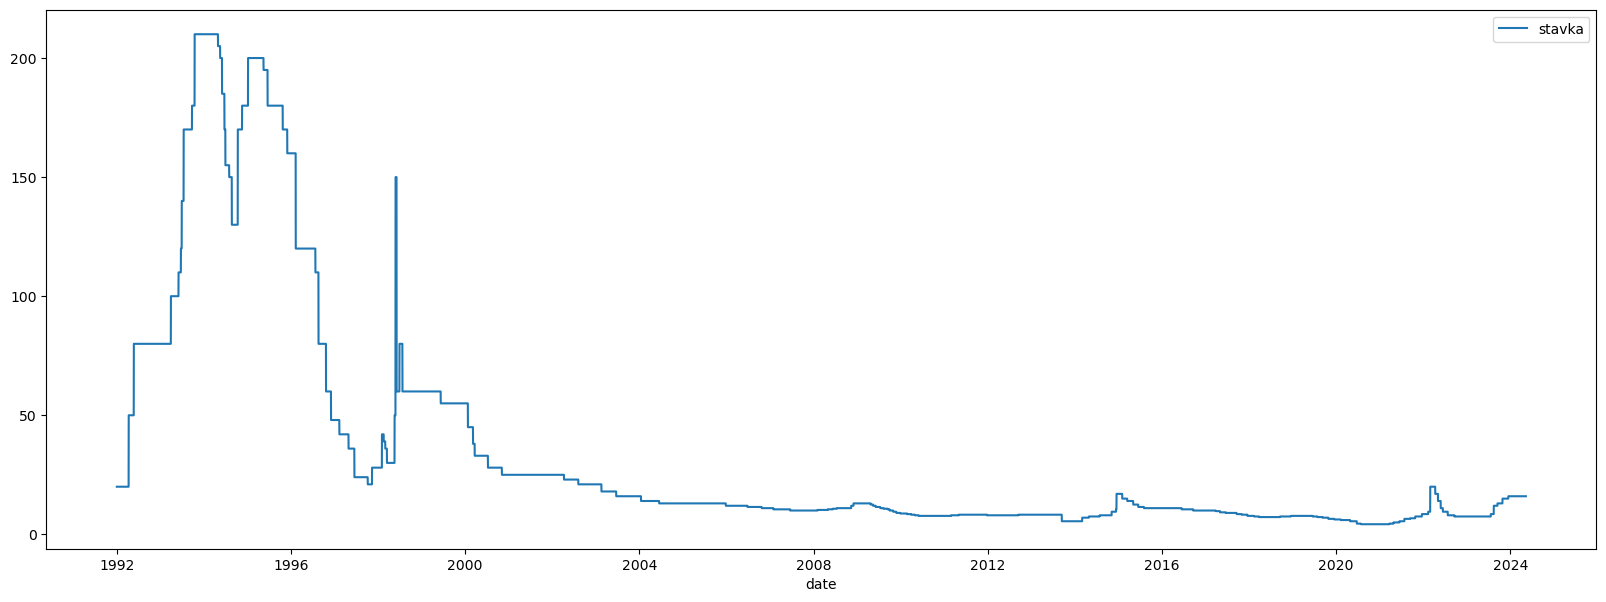

In [241]:
plt.figure(figsize=(20,7))
sns.lineplot(data=kluch.set_index('date'))

# ОБРАБОТКА USD

In [219]:
usd = pd.read_csv('data/USD_RUB.csv',sep=',',parse_dates=['Date'], dayfirst=True)

In [220]:
usd

,Date,Price,Open,Max,Min,Change
0,2024-05-10,92.2550,91.9500,92.4407,91.7275,0.33
1,2024-05-08,91.9500,91.1075,92.1281,91.1075,0.92
2,2024-05-07,91.1075,91.3475,91.4175,90.9277,-0.26
3,2024-05-06,91.3475,91.6000,92.0779,90.8618,-0.28
4,2024-05-03,91.6000,92.0500,92.1625,91.4504,-0.49
...,...,...,...,...,...,...
5841,2001-09-20,29.4300,29.4550,29.4760,29.4030,-0.08
5842,2001-09-19,29.4530,29.4600,29.4810,29.4300,-0.02
5843,2001-09-18,29.4600,29.4450,29.4750,29.4400,0.00
5844,2001-09-17,29.4610,29.4600,29.4730,29.4400,-0.04


In [221]:
p = pd.date_range(start='09-14-2001', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['Date'])

# Объединяем исходный df с df_full
usd = pp.merge(usd, on='Date', how='left')

In [223]:
usd.ffill(inplace=True)

In [224]:
usd

,Date,Price,Open,Max,Min,Change
0,2001-09-14,29.4730,29.3500,29.4800,29.3500,0.00
1,2001-09-15,29.4730,29.3500,29.4800,29.3500,0.00
2,2001-09-16,29.4730,29.3500,29.4800,29.3500,0.00
3,2001-09-17,29.4610,29.4600,29.4730,29.4400,-0.04
4,2001-09-18,29.4600,29.4450,29.4750,29.4400,0.00
...,...,...,...,...,...,...
8270,2024-05-06,91.3475,91.6000,92.0779,90.8618,-0.28
8271,2024-05-07,91.1075,91.3475,91.4175,90.9277,-0.26
8272,2024-05-08,91.9500,91.1075,92.1281,91.1075,0.92
8273,2024-05-09,91.9500,91.1075,92.1281,91.1075,0.92


In [225]:
usd.to_csv('ready_data/usd.csv',encoding='utf-8')

<Axes: xlabel='Date'>

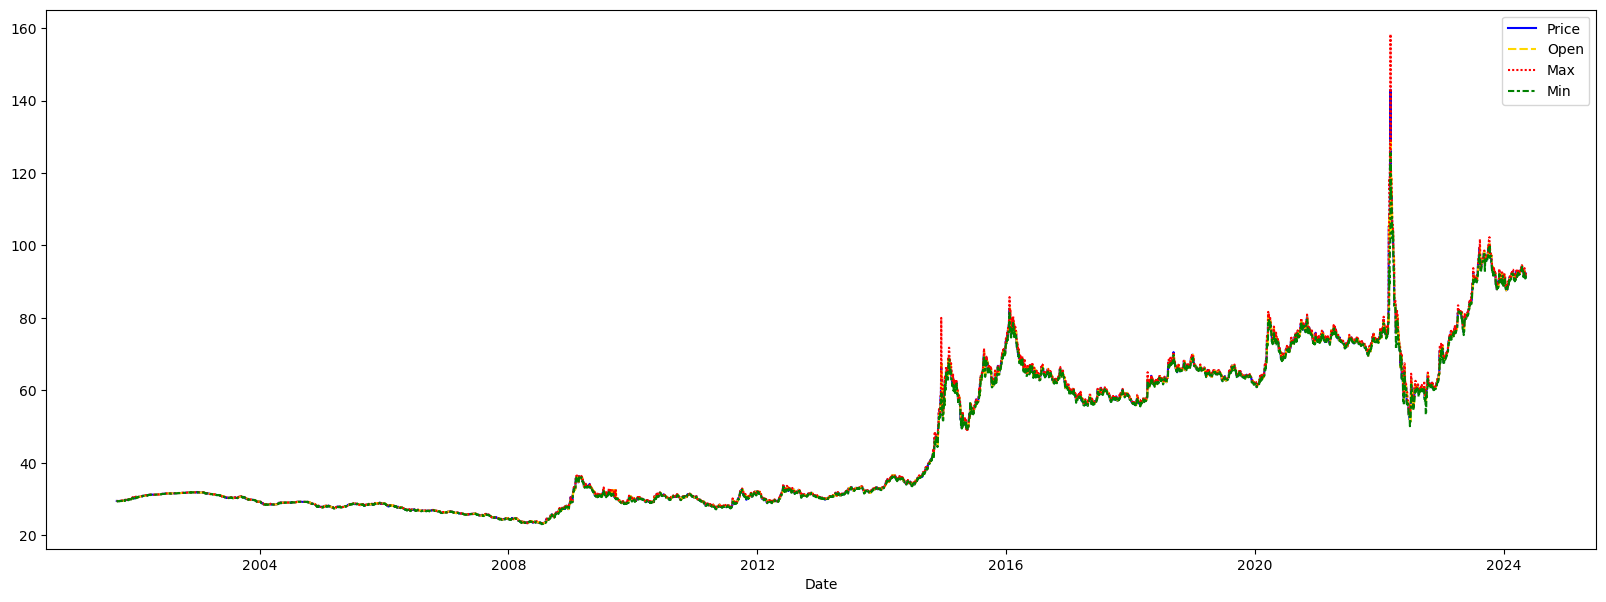

In [227]:
plt.figure(figsize=(20,7))
sns.lineplot(data=usd.set_index('Date')[['Price','Open','Max','Min']],palette=['blue','gold','red','green'])

# ОБРАБОТКА GDP

In [62]:
vvp = pd.read_csv('data/vvp.csv',sep = ';')

In [11]:
# vvp['vvp'] = vvp['vvp']*1000000000.0 

In [63]:
vvp

,year,vvp
0,2001,328.5
1,2002,370.1
2,2003,461.5
3,2004,633.3
4,2005,817.7
5,2006,1060.9
6,2007,1393.4
7,2008,1779.1
8,2009,1307.9
9,2010,1633.1


In [64]:
vvp['year'] ='01-01-' + vvp['year'].astype('str')

In [71]:
vvp.year = vvp.year.astype('datetime64[ns]')

In [72]:
r = pd.date_range(start='01-01-2001', end='05-10-2024', freq='D')
rr = pd.DataFrame(r, columns=['year'])

# Объединяем исходный df с df_full
vvp = rr.merge(vvp, on='year', how='left')

In [75]:
vvp.vvp.ffill(inplace=True)

C:\Users\pelik\AppData\Local\Temp\ipykernel_4328\3343703737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vvp.vvp.ffill(inplace=True)


In [82]:
vvp

,year,vvp
0,2001-01-01,328.5
1,2001-01-02,328.5
2,2001-01-03,328.5
3,2001-01-04,328.5
4,2001-01-05,328.5
...,...,...
8526,2024-05-06,1997.0
8527,2024-05-07,1997.0
8528,2024-05-08,1997.0
8529,2024-05-09,1997.0


In [77]:
vvp.to_csv('ready_data/vvp.csv',encoding='utf-8')

<Axes: xlabel='year', ylabel='vvp'>

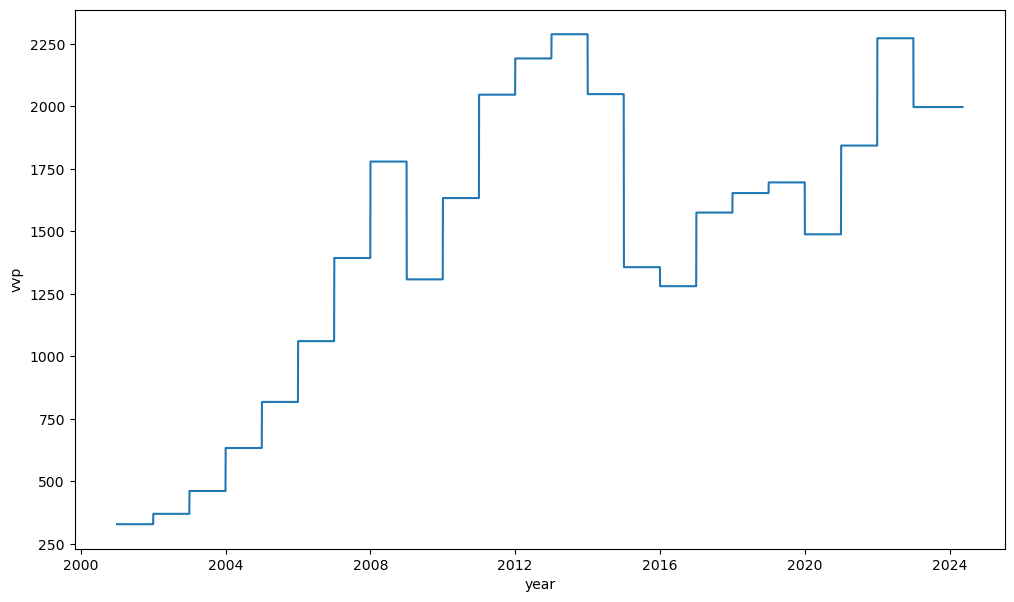

In [84]:
plt.figure(figsize=(12,7))
sns.lineplot(data=vvp,y='vvp',x='year')

# CREATING DF

In [209]:
tatn = pd.read_csv('data/TATN.csv',sep=',',parse_dates=['Date'], dayfirst=True)

In [214]:
tatn

,Date,Price,Open,Max,Min,Volume,Change
0,2024-05-10,728.90,722.00,728.90,722.00,545.75K,0.98%
1,2024-05-08,721.80,718.00,723.80,717.20,744.91K,0.53%
2,2024-05-07,718.00,715.10,721.20,714.10,1.27000K,0.41%
3,2024-05-06,715.10,718.40,719.70,711.20,2.29000K,-0.46%
4,2024-05-03,718.40,719.90,721.90,717.30,689.23K,-0.18%
...,...,...,...,...,...,...,...
5583,2001-12-18,14.41,14.55,14.72,14.35,585.30K,-0.89%
5584,2001-12-17,14.54,14.58,14.60,14.16,171.80K,1.32%
5585,2001-12-14,14.35,14.50,14.50,14.24,156.70K,0.00%
5586,2001-12-13,14.35,15.04,15.04,14.35,681.30K,-4.90%


In [215]:
p = pd.date_range(start='12-11-2001', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['Date'])

# Объединяем исходный df с df_full
tatn = pp.merge(tatn, on='Date', how='left')

In [217]:
tatn.ffill(inplace=True)

In [218]:
tatn

,Date,Price,Open,Max,Min,Volume,Change
0,2001-12-11,15.09,14.90,15.10,14.88,348.30K,1.96%
1,2001-12-12,15.09,14.90,15.10,14.88,348.30K,1.96%
2,2001-12-13,14.35,15.04,15.04,14.35,681.30K,-4.90%
3,2001-12-14,14.35,14.50,14.50,14.24,156.70K,0.00%
4,2001-12-15,14.35,14.50,14.50,14.24,156.70K,0.00%
...,...,...,...,...,...,...,...
8182,2024-05-06,715.10,718.40,719.70,711.20,2.29000K,-0.46%
8183,2024-05-07,718.00,715.10,721.20,714.10,1.27000K,0.41%
8184,2024-05-08,721.80,718.00,723.80,717.20,744.91K,0.53%
8185,2024-05-09,721.80,718.00,723.80,717.20,744.91K,0.53%


# MB RF

In [484]:
mb = pd.read_csv('data/ms_m21.csv',sep =';',parse_dates=['Date'],dayfirst=True)

In [485]:
mb

,Date,M2
0,1993-01-01,6.5
1,1993-02-01,7.7
2,1993-03-01,8.4
3,1993-04-01,9.6
4,1993-05-01,11.8
...,...,...
371,2023-12-01,92546.9
372,2024-01-01,98385.4
373,2024-02-01,97816.7
374,2024-03-01,99422.0


In [486]:
p = pd.date_range(start='01-01-1993', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['Date'])

# Объединяем исходный df с df_full
mb = pp.merge(mb, on='Date', how='left')

In [489]:
mb.ffill(inplace=True)

# COMBINING IT ALL

In [812]:
df = tatn[['Date','Price']]

In [813]:
vvp.rename(columns={'year':'Date'},inplace=True)

In [814]:
df = df.merge(vvp, on='Date', how='left')

In [815]:
usd.rename(columns={'Price':'USD/RUB'},inplace=True)

In [816]:
df = df.merge(usd[['Date','USD/RUB']], on='Date', how='left')

In [817]:
kluch.rename(columns={'date':'Date'},inplace=True)

In [818]:
df = df.merge(kluch, on='Date', how='left')

In [819]:
inflation.rename(columns={'Year':'Date',' Total':'Inflation/year'},inplace=True)

In [820]:
df = df.merge(inflation, on='Date', how='left')

In [821]:
brent.rename(columns={'Price':'Brent'},inplace=True)

In [822]:
df = df.merge(brent[['Date','Brent']], on='Date', how='left')

In [823]:
df = df.merge(mb, on='Date', how='left')

In [785]:
df

,Date,Price,vvp,USD/RUB,stavka,Inflation/year,Brent,M2
0,2001-12-11,15.09,328.5,30.0750,25.0,18.58,17.91,1448.2
1,2001-12-12,15.09,328.5,30.1080,25.0,18.58,18.20,1448.2
2,2001-12-13,14.35,328.5,30.3350,25.0,18.58,17.80,1448.2
3,2001-12-14,14.35,328.5,30.3350,25.0,18.58,18.38,1448.2
4,2001-12-15,14.35,328.5,30.3350,25.0,18.58,18.38,1448.2
...,...,...,...,...,...,...,...,...
8182,2024-05-06,715.10,1997.0,91.3475,16.0,7.42,83.60,99595.8
8183,2024-05-07,718.00,1997.0,91.1075,16.0,7.42,82.99,99595.8
8184,2024-05-08,721.80,1997.0,91.9500,16.0,7.42,83.58,99595.8
8185,2024-05-09,721.80,1997.0,91.9500,16.0,7.42,83.88,99595.8


In [545]:
mb.columns

Index(['Date', 'M2'], dtype='object')

In [824]:
df = df.reset_index()[['Price','index','USD/RUB','Inflation/year','Brent','vvp','M2']]

In [825]:
df['Brent'] = df['Brent'] * df['USD/RUB']
df['vvp'] = df['vvp'] * df['USD/RUB'] * 1000000
df['M2'] = df['M2'] * 1000000

In [805]:
df.describe()

,Price,index,USD/RUB,Inflation/year,Brent,vvp,M2
count,8187.000000,8187.00000,8187.000000,8187.000000,8187.000000,8187.000000,8187.000000
mean,280.658714,4093.00000,46.352322,8.762177,3202.831578,73998.931163,30236.165677
std,221.995222,2363.52766,20.817270,3.477143,1828.015382,47136.660096,24458.760365
min,14.350000,0.00000,23.156000,2.520000,538.643250,9879.637500,1448.200000
25%,122.020000,2046.50000,29.217500,6.100000,1826.238095,35905.131200,10827.400000
50%,201.010000,4093.00000,32.404300,8.780000,3154.512256,70204.702500,26768.400000
75%,417.100000,6139.50000,64.476850,11.870000,3818.756840,104735.898300,44254.700000
max,837.000000,8186.00000,143.000000,18.580000,17619.030000,324938.900000,99595.800000


In [549]:
df.head()

,Price,index,vvp,USD/RUB,Inflation/year,Brent,M2
0,15.09,0,9.879637e+12,30.075,18.58,538.64325,1.448200e+12
1,15.09,1,9.890478e+12,30.108,18.58,547.96560,1.448200e+12
2,14.35,2,9.965048e+12,30.335,18.58,539.96300,1.448200e+12
3,14.35,3,9.965048e+12,30.335,18.58,557.55730,1.448200e+12
4,14.35,4,9.965048e+12,30.335,18.58,557.55730,1.448200e+12


# ANALYSIS

<Axes: >

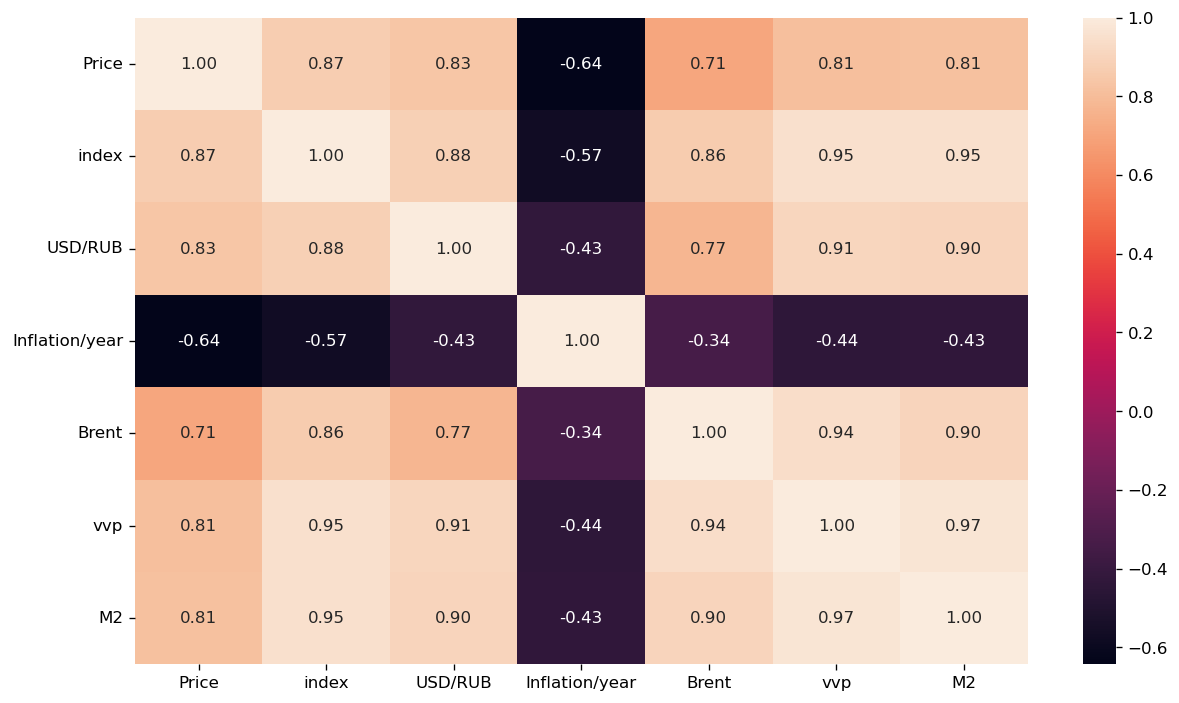

In [575]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.corr(),annot = True, fmt='.2f')

In [298]:
import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [581]:
for i in df.columns:
    print(f"{i}:{pearsonr(df['Price'], df[i])}")

Price:PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
index:PearsonRResult(statistic=0.8687954930312227, pvalue=0.0)
USD/RUB:PearsonRResult(statistic=0.8337987136557656, pvalue=0.0)
Inflation/year:PearsonRResult(statistic=-0.6434121991972096, pvalue=0.0)
Brent:PearsonRResult(statistic=0.7094451193183776, pvalue=0.0)
vvp:PearsonRResult(statistic=0.8115348218422024, pvalue=0.0)
M2:PearsonRResult(statistic=0.8143858245495624, pvalue=0.0)


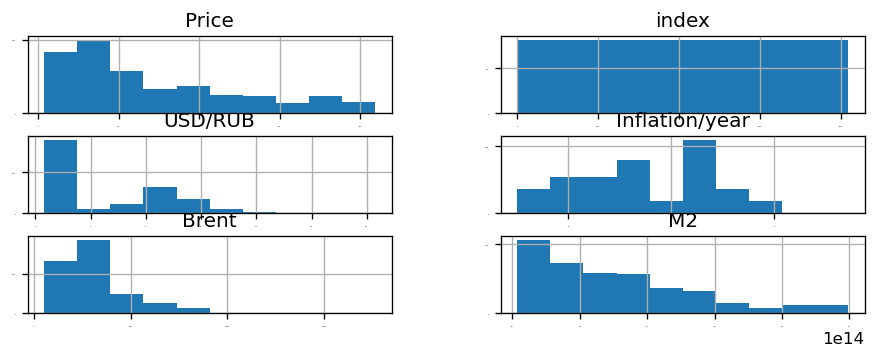

In [556]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [307]:
from sklearn.preprocessing import StandardScaler

In [308]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [310]:
df.columns

Index(['Price', 'index', 'vvp', 'USD/RUB', 'Inflation/year', 'Brent'], dtype='object')

In [578]:
df_1 = df.copy()

# Определяем зависимые и не зависимые переменные
X = df_1[['index', 'M2','vvp', 'USD/RUB', 'Inflation/year', 'Brent']]
y = df_1['Price']

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модель
model_1 = LinearRegression()
model_1.fit(X_scaled, y)

# Получаем коэфф. / веса параметров
coefficients = model_1.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_1.intercept_
print(intercept)

[ 158.56926823    2.83291479 -198.74532567  141.38489738  -51.39979852
   78.40144517] 

280.65871381458413


In [579]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     6901.
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        17:17:53   Log-Likelihood:                -48471.
No. Observations:                8187   AIC:                         9.696e+04
Df Residuals:                    8180   BIC:                         9.701e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6587      0.997    281.539      0.0

In [582]:
predictions = result.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(rmse)
print(mean_absolute_error(y, predictions))
print(mean_absolute_percentage_error(y, predictions))

90.1604724630424
66.24606015844836
0.3789666521990633


# При разделении на 2 выборки

In [589]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

# Итерация по разбиениям и обучение модели
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [591]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [592]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Получаем коэфф. / веса параметров
coefficients = model_2.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_2.intercept_
print(intercept)

[   0.         -304.45120407  511.42362761 -105.39697165  120.74445731
  -39.55090712  158.18214113] 

381.86234175416325


In [593]:
est = sm.OLS(y_train, sm.add_constant(X_train_scaled))
result = est.fit()

# Делаем предсказания на тестовых данных
X_test_const = sm.add_constant(X_test_scaled)
predictions = result.predict(X_test_const)

# Вычисляем метрики
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 265.55905232957303
Mean Squared Error (MSE): 90859.45438182546
Mean Absolute Percentage Error (MAPE): 55.295746221183265


In [594]:
# Выводим формулу регрессии
coefficients = result.params
variable_names = df.columns
equation = "y = {:.2f}".format(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + {:.2f} * {}".format(coefficients[i], variable_names[i-1])
print("Regression Equation:")
print(equation)


Regression Equation:
y = 237.15 + 0.00 * Price + -253.73 * index + 319.86 * USD/RUB + -70.79 * Inflation/year + 93.11 * Brent + -41.85 * vvp + 96.86 * M2


# Lasso

In [595]:
lasso = Lasso()

lasso.fit(X_train_scaled, y_train)

y_approx_1 = lasso.predict(X_train_scaled)
y_pred_1 = lasso.predict(X_test_scaled)

In [596]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_1)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_1)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_1)
print('MAPE on test: {:.2%}'.format(mape_test_1))


mse_test_1 = mean_squared_error(y_test, y_pred_1)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_approx_1 = r2_score(y_test, y_pred_1)
print('R^2 on test: {:.2}'.format(r2_approx_1))

MAPE on train: 31.37%
MSE on train: 5386.23
R^2 on train: 0.88 

MAPE on test: 55.38%
MSE on test: 89389.15
R^2 on test: -6.5


# Ridge

In [597]:
ridge = Ridge()

ridge.fit(X_train_scaled, y_train)

y_approx_3 = ridge.predict(X_train_scaled)
y_pred_3 = ridge.predict(X_test_scaled)

In [598]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_3)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_3)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_3)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_3)
print('MAPE on test: {:.2%}'.format(mape_test_1))


mse_test_1 = mean_squared_error(y_test, y_pred_3)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_approx_1 = r2_score(y_test, y_pred_3)
print('R^2 on test: {:.2}'.format(r2_approx_1))

MAPE on train: 42.24%
MSE on train: 5120.74
R^2 on train: 0.89 

MAPE on test: 55.28%
MSE on test: 90779.94
R^2 on test: -6.6


# Валидация

## Лассо

In [599]:
cv = KFold(n_splits=4, shuffle=False, random_state=None)

In [600]:
grid = {'alpha': np.linspace(0.1, 1, 20)}

In [601]:
gs_lasso = GridSearchCV(Lasso(), 
                  grid, 
                  n_jobs=-1,
                  cv=cv) 

In [602]:
gs_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [603]:
a = gs_lasso.best_params_['alpha']
print(f'best alpha = {a}')

best alpha = 1.0


In [604]:
mape_train_best_lasso = mean_absolute_percentage_error(y_train, gs_lasso.best_estimator_.predict(X_train_scaled))
mse_train_best_lasso = mean_squared_error(y_train, gs_lasso.best_estimator_.predict(X_train_scaled))
mae_train_best_lasso = mean_absolute_error(y_train, gs_lasso.best_estimator_.predict(X_train_scaled))

mape_test_best_lasso = mean_absolute_percentage_error(y_test, gs_lasso.best_estimator_.predict(X_test_scaled))
mse_test_best_lasso = mean_squared_error(y_test, gs_lasso.best_estimator_.predict(X_test_scaled))
mae_test_best_lasso = mean_absolute_error(y_test, gs_lasso.best_estimator_.predict(X_test_scaled))

print('MAPE on train: {:.2%}'.format(mape_train_best_lasso))
print('MSE on train: {:.2f}'.format(mse_train_best_lasso))
print('MAE on train:', mae_train_best_lasso,'\n') 

print(f'R^2 = {round(gs_lasso.best_score_, 4)}','\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_lasso))
print('MSE on test: {:.2f}'.format(mse_test_best_lasso))
print('MSE on test: {:.2f}'.format(mse_test_best_lasso))
print('MAE on train:', mae_test_best_lasso) 

MAPE on train: 31.37%
MSE on train: 5386.23
MAE on train: 57.1089458806003 

R^2 = -5.6166 

MAPE on test: 55.38%
MSE on test: 89389.15
MSE on test: 89389.15
MAE on train: 267.28960035854686


In [605]:
for i, coef in enumerate(gs_lasso.best_estimator_.coef_):
    print(f'Coefficient for feature {i}: {round(coef, 2)}')


Coefficient for feature 0: 0.0
Coefficient for feature 1: -157.42
Coefficient for feature 2: 218.6
Coefficient for feature 3: -36.52
Coefficient for feature 4: 86.73
Coefficient for feature 5: -36.61
Coefficient for feature 6: 74.38


## Гребневая

In [606]:
gs_ridge = GridSearchCV(Ridge(), 
                  grid, 
                  n_jobs=-1,
                  cv=cv) 

In [607]:
gs_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [608]:
a = gs_ridge.best_params_['alpha']
print(f'best alpha = {a}')

best alpha = 1.0


In [609]:
for i, coef in enumerate(gs_ridge.best_estimator_.coef_):
    print(f'Coefficient for feature {i}: {round(coef, 2)}')


Coefficient for feature 0: 0.0
Coefficient for feature 1: -249.22
Coefficient for feature 2: 315.56
Coefficient for feature 3: -70.82
Coefficient for feature 4: 93.35
Coefficient for feature 5: -41.75
Coefficient for feature 6: 96.5


In [610]:
mape_train_best_ridge = mean_absolute_percentage_error(y_train, gs_ridge.best_estimator_.predict(X_train_scaled))
mse_train_best_ridge = mean_squared_error(y_train, gs_ridge.best_estimator_.predict(X_train_scaled))
mae_train_best_ridge = mean_absolute_error(y_train, gs_ridge.best_estimator_.predict(X_train_scaled))

mape_test_best_ridge = mean_absolute_percentage_error(y_test, gs_ridge.best_estimator_.predict(X_test_scaled))
mse_test_best_ridge = mean_squared_error(y_test, gs_ridge.best_estimator_.predict(X_test_scaled))
mae_test_best_ridge = mean_absolute_error(y_test, gs_ridge.best_estimator_.predict(X_test_scaled))

print('MAPE on train: {:.2%}'.format(mape_train_best_ridge))
print('MSE on train: {:.2f}'.format(mse_train_best_ridge))
print('MAE on train: {:.2f}'.format(mae_train_best_ridge),'\n') 

print(f'R^2 = {round(gs_ridge.best_score_, 4)}','\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_ridge))
print('MSE on test: {:.2f}'.format(mse_test_best_ridge))
print('MAE on test: {:.2f}'.format(mae_test_best_ridge))

MAPE on train: 42.24%
MSE on train: 5120.74
MAE on train: 58.82 

R^2 = -12.2422 

MAPE on test: 55.28%
MSE on test: 90779.94
MAE on test: 265.56


# L1 & L2

In [611]:
grid_combo = {'alpha': np.linspace(0.1, 1, 20),
        'l1_ratio':np.linspace(0.1, 1, 20)}

In [612]:
gs_ElasticNet = GridSearchCV(ElasticNet(), 
                  grid_combo, 
                  n_jobs=-1,
                  cv=cv) 

In [613]:
gs_ElasticNet.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
                         'l1_ratio': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [614]:
a, b = gs_ElasticNet.best_params_['alpha'], gs_ElasticNet.best_params_['l1_ratio']
print(f'best alpha = {a}')
print(f'best l1 ratio = {b}')

best alpha = 1.0
best l1 ratio = 0.1


In [615]:
for i, coef in enumerate(gs_ElasticNet.best_estimator_.coef_):
    print(f'Coefficient for feature {i}: {round(coef, 2)}')


Coefficient for feature 0: 0.0
Coefficient for feature 1: 26.97
Coefficient for feature 2: 34.41
Coefficient for feature 3: 27.51
Coefficient for feature 4: 39.29
Coefficient for feature 5: -25.05
Coefficient for feature 6: 25.34


In [616]:
print(f'R^2 = {round(gs_ElasticNet.best_score_, 4)}')

R^2 = -2.1147


In [617]:
mape_train_best_ElasticNet = mean_absolute_percentage_error(y_train, gs_ElasticNet.best_estimator_.predict(X_train_scaled))
mse_train_best_ElasticNet = mean_squared_error(y_train, gs_ElasticNet.best_estimator_.predict(X_train_scaled))

mape_test_best_ElasticNet = mean_absolute_percentage_error(y_test, gs_ElasticNet.best_estimator_.predict(X_test_scaled))
mse_test_best_ElasticNet = mean_squared_error(y_test, gs_ElasticNet.best_estimator_.predict(X_test_scaled))


print('MAPE on train: {:.2%}'.format(mape_train_best_ElasticNet))
print('MSE on train: {:.2f}'.format(mse_train_best_ElasticNet),'\n')

print(f'R^2 = {round(gs_ElasticNet.best_score_, 4)}\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_ElasticNet))
print('MSE on test: {:.2f}'.format(mse_test_best_ElasticNet))

MAPE on train: 34.18%
MSE on train: 8630.63 

R^2 = -2.1147

MAPE on test: 53.53%
MSE on test: 84698.18


In [618]:
df

,Price,index,USD/RUB,Inflation/year,Brent,vvp,M2
0,15.09,0,30.0750,18.58,538.643250,9.879637e+12,1.448200e+12
1,15.09,1,30.1080,18.58,547.965600,9.890478e+12,1.448200e+12
2,14.35,2,30.3350,18.58,539.963000,9.965048e+12,1.448200e+12
3,14.35,3,30.3350,18.58,557.557300,9.965048e+12,1.448200e+12
4,14.35,4,30.3350,18.58,557.557300,9.965048e+12,1.448200e+12
...,...,...,...,...,...,...,...
8182,715.10,8182,91.3475,7.42,7636.651000,1.824210e+14,9.959580e+13
8183,718.00,8183,91.1075,7.42,7561.011425,1.819417e+14,9.959580e+13
8184,721.80,8184,91.9500,7.42,7685.181000,1.836242e+14,9.959580e+13
8185,721.80,8185,91.9500,7.42,7712.766000,1.836242e+14,9.959580e+13


# ENSEMBLES

In [663]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [907]:
# Split-out validation dataset
array = df.values
X = array[:,1:7]
Y = array[:,0]
validation_size = 0.3
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, shuffle=True)

# Создание объекта TimeSeriesSplit с учетом тренда
# tscv = TimeSeriesSplit(n_splits=10)

# # Итерация по разбиениям и обучение модели
# for train_index, test_index in tscv.split(X_train):
#     X_train, X_test = x_train[train_index], x_train[test_index]
#     y_train, y_test = Y_train[train_index], Y_train[test_index]

In [763]:
test_index

array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120])

### 4. Evaluate Algorithms: Baseline

In [871]:
# Test options and evaluation metric
num_folds = 2
seed = 7
scoring = 'neg_mean_absolute_percentage_error'
# scoring = 'r2'

In [872]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.388474 (0.018861)
LASSO: -0.387268 (0.018803)
EN: -0.379426 (0.018254)
KNN: -0.054141 (0.000277)
CART: -0.028278 (0.001026)
SVR: -0.482633 (0.009149)


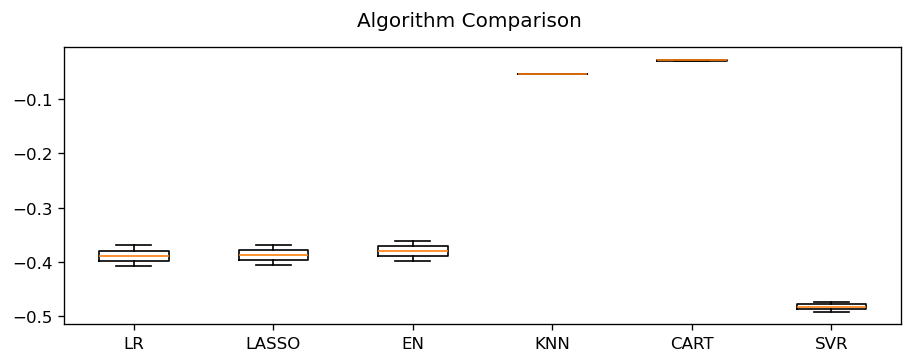

In [873]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 5. Evaluate Algorithms: Standardize Data

In [874]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.388474 (0.018861)
ScaledLASSO: -0.376086 (0.018119)
ScaledEN: -0.388118 (0.015455)
ScaledKNN: -0.039420 (0.000024)
ScaledCART: -0.028199 (0.000837)
ScaledSVR: -0.517738 (0.019226)


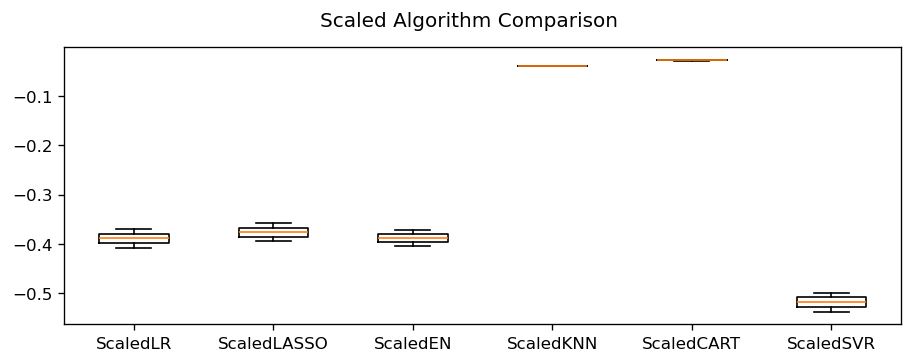

In [875]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 6. Algorithm Tuning

In [876]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(max_depth=k_values)
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.027780 using {'max_depth': 17}
-0.873338 (0.017303) with: {'max_depth': 1}
-0.181490 (0.002615) with: {'max_depth': 3}
-0.078755 (0.000523) with: {'max_depth': 5}
-0.049155 (0.000044) with: {'max_depth': 7}
-0.037089 (0.002136) with: {'max_depth': 9}
-0.031127 (0.001771) with: {'max_depth': 11}
-0.029316 (0.001626) with: {'max_depth': 13}
-0.028532 (0.001537) with: {'max_depth': 15}
-0.027780 (0.001231) with: {'max_depth': 17}
-0.028385 (0.001566) with: {'max_depth': 19}
-0.028324 (0.001266) with: {'max_depth': 21}


### 7. Ensemble Methods

In [877]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.152536 (0.019689)
ScaledGBM: -0.058643 (0.002918)
ScaledRF: -0.027934 (0.001355)
ScaledET: -0.022977 (0.000617)


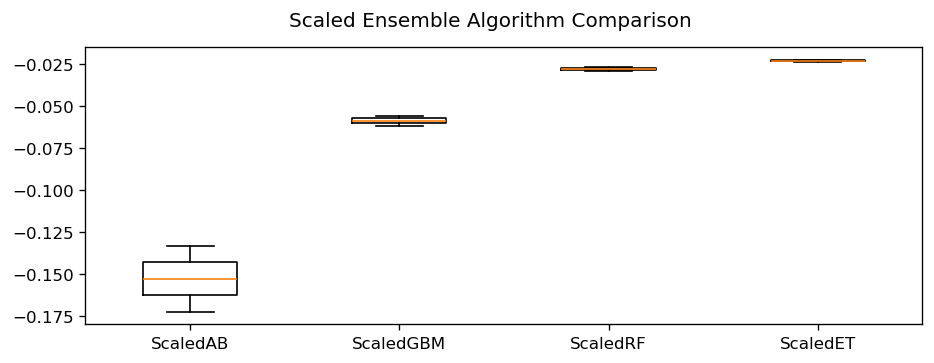

In [878]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [879]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [880]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.021180 using {'n_estimators': 400}
-0.021447 (0.000399) with: {'n_estimators': 50}
-0.021389 (0.000488) with: {'n_estimators': 100}
-0.021274 (0.000467) with: {'n_estimators': 150}
-0.021290 (0.000478) with: {'n_estimators': 200}
-0.021267 (0.000511) with: {'n_estimators': 250}
-0.021248 (0.000568) with: {'n_estimators': 300}
-0.021219 (0.000566) with: {'n_estimators': 350}
-0.021180 (0.000570) with: {'n_estimators': 400}


### 8. Finalize Model

In [908]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

ExtraTreesRegressor(n_estimators=400, random_state=7)

In [909]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

0.9991814728737879
39.12456713305329
2.879074420024507
0.011342786867555335


In [924]:
np.array(df.iloc[-4:-1, 1:])

array([[8.18300000e+03, 9.11075000e+01, 7.42000000e+00, 7.56101142e+03,
        1.81941678e+11, 9.95958000e+10],
       [8.18400000e+03, 9.19500000e+01, 7.42000000e+00, 7.68518100e+03,
        1.83624150e+11, 9.95958000e+10],
       [8.18500000e+03, 9.19500000e+01, 7.42000000e+00, 7.71276600e+03,
        1.83624150e+11, 9.95958000e+10]])

array([[7.69800000e+03, 7.21225000e+01, 7.42000000e+00, 5.66666482e+03,
        1.44028632e+11, 8.23880000e+10],
       [3.54100000e+03, 2.90975000e+01, 6.10000000e+00, 3.15300510e+03,
        5.95509435e+10, 2.08281000e+10],
       [2.84400000e+03, 3.01345000e+01, 8.80000000e+00, 1.95331829e+03,
        3.94129126e+10, 1.27973000e+10],
       ...,
       [4.21900000e+03, 3.28350000e+01, 6.45000000e+00, 3.35442360e+03,
        7.51396140e+10, 2.75934000e+10],
       [3.31900000e+03, 3.00995000e+01, 6.10000000e+00, 2.95336294e+03,
        6.16016367e+10, 2.00119000e+10],
       [2.64700000e+03, 3.49970000e+01, 8.80000000e+00, 1.44887580e+03,
        4.57725763e+10, 1.14652000e+10]])

In [925]:
scaler.transform(np.array(df.iloc[-4:-1, 1:]))

array([[ 1.7303264 ,  2.13622882, -0.38258841,  2.36544485,  2.27583061,
         2.82913539],
       [ 1.73074966,  2.17650701, -0.38258841,  2.43297479,  2.31136207,
         2.82913539],
       [ 1.73117292,  2.17650701, -0.38258841,  2.44797696,  2.31136207,
         2.82913539]])

In [957]:
factors = scaler.transform(np.array([[8187,94.163,7.42,7595.3,184233200000.0,99595800000.0]]))  # Example list of factors

# Make predictions
pep = model.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

Forecasted Values: [719.56975]


In [956]:
factors = scaler.transform(np.array([[8419,104.65,5.1,8058.05,173606615000.0,112000000.0]]))  # Example list of factors

# Make predictions
pep = model.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

Forecasted Values: [455.30615]


In [941]:
df

,Price,index,USD/RUB,Inflation/year,Brent,vvp,M2
0,15.09,0,30.0750,18.58,538.643250,9.879637e+09,1.448200e+09
1,15.09,1,30.1080,18.58,547.965600,9.890478e+09,1.448200e+09
2,14.35,2,30.3350,18.58,539.963000,9.965048e+09,1.448200e+09
3,14.35,3,30.3350,18.58,557.557300,9.965048e+09,1.448200e+09
4,14.35,4,30.3350,18.58,557.557300,9.965048e+09,1.448200e+09
...,...,...,...,...,...,...,...
8182,715.10,8182,91.3475,7.42,7636.651000,1.824210e+11,9.959580e+10
8183,718.00,8183,91.1075,7.42,7561.011425,1.819417e+11,9.959580e+10
8184,721.80,8184,91.9500,7.42,7685.181000,1.836242e+11,9.959580e+10
8185,721.80,8185,91.9500,7.42,7712.766000,1.836242e+11,9.959580e+10


In [677]:

X_train = pd.DataFrame(X_train, columns=['index', 'M2','vvp', 'USD/RUB', 'Inflation/year', 'Brent'])

In [678]:
df.columns

Index(['Price', 'index', 'USD/RUB', 'Inflation/year', 'Brent', 'vvp', 'M2'], dtype='object')

# Интерпретация параметров

In [679]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                importance
index             0.277617
USD/RUB           0.253782
M2                0.215741
Inflation/year    0.148413
Brent             0.097505
vvp               0.006943


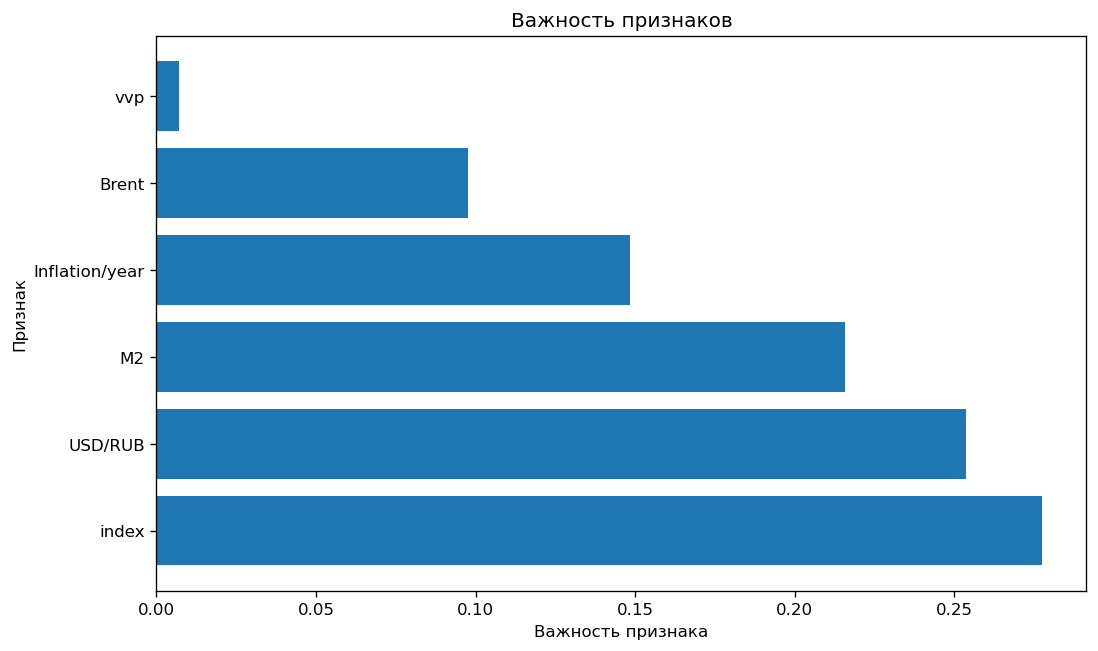

In [680]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

In [681]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


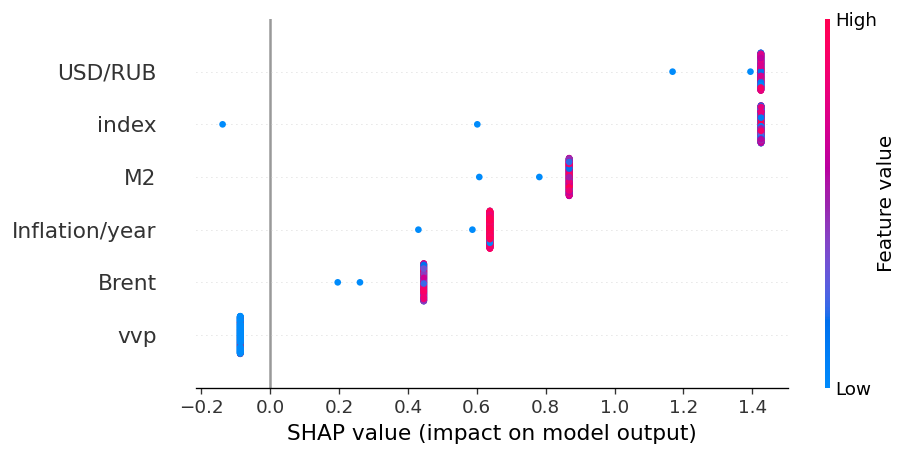

In [682]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [861]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [867]:
df

,Price,index,USD/RUB,Inflation/year,Brent,vvp,M2
0,15.09,0,30.0750,18.58,538.643250,9.879637e+09,1.448200e+09
1,15.09,1,30.1080,18.58,547.965600,9.890478e+09,1.448200e+09
2,14.35,2,30.3350,18.58,539.963000,9.965048e+09,1.448200e+09
3,14.35,3,30.3350,18.58,557.557300,9.965048e+09,1.448200e+09
4,14.35,4,30.3350,18.58,557.557300,9.965048e+09,1.448200e+09
...,...,...,...,...,...,...,...
8182,715.10,8182,91.3475,7.42,7636.651000,1.824210e+11,9.959580e+10
8183,718.00,8183,91.1075,7.42,7561.011425,1.819417e+11,9.959580e+10
8184,721.80,8184,91.9500,7.42,7685.181000,1.836242e+11,9.959580e+10
8185,721.80,8185,91.9500,7.42,7712.766000,1.836242e+11,9.959580e+10


In [897]:
factors = [[850,1,74,75.9,1.82332,9.950]]  # Example list of factors

# Make predictions
pep = model.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

Forecasted Values: [456.49775]


In [700]:
model

ExtraTreesRegressor(n_estimators=250, random_state=7)